In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import random

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [3]:
solarData = pd.read_csv("Downloads/solar_dem_data_all.csv")

del solarData["Unnamed: 0"]

In [4]:
solarData.head()

,count_year1,count_year2,count_year3,count_year_final,energy_year1,energy_year2,energy_year3,population,housing_unit_count,average_household_income,...,travel_time_20_29_rate,travel_time_30_39_rate,travel_time_40_59_rate,travel_time_60_89_rate,health_insurance_public_rate,health_insurance_none_rate,age_median,travel_time_average,voting_2016_dem_percentage,voting_2016_gop_percentage
0,1,3,3,2,2523244,2393958,2447311,7950,1884,40032.303371,...,0.187996,0.241395,0.116946,0.076787,0.579119,0.231069,23.900000,30.000000,0.413435,0.533863
1,6,15,76,82,33375976,33743461,34004231,41601,10290,40903.860628,...,0.224182,0.228057,0.117137,0.056603,0.499502,0.310764,25.375000,26.875000,0.397203,0.547314
2,7,15,45,39,15875248,15944197,15789694,49630,11670,40662.615955,...,0.062785,0.166233,0.171438,0.185751,0.434547,0.217048,26.283333,32.000000,0.400062,0.540961
3,1,2,4,10,5633924,5401396,5145561,7884,2356,61089.189189,...,0.126301,0.327550,0.070090,0.005552,0.413679,0.142131,32.600000,23.000000,0.397203,0.547314
4,23,55,88,99,34219362,34439526,33542188,62584,19742,67609.312575,...,0.116658,0.057534,0.034742,0.063558,0.354914,0.141116,32.358333,20.363636,0.494118,0.455315


In [5]:
ran_data = solarData.sample(frac=1)
ran_data.head()

,count_year1,count_year2,count_year3,count_year_final,energy_year1,energy_year2,energy_year3,population,housing_unit_count,average_household_income,...,travel_time_20_29_rate,travel_time_30_39_rate,travel_time_40_59_rate,travel_time_60_89_rate,health_insurance_public_rate,health_insurance_none_rate,age_median,travel_time_average,voting_2016_dem_percentage,voting_2016_gop_percentage
545,9,14,73,102,14197877,14596648,14152956,24860,8012,68042.467249,...,0.218690,0.158943,0.050938,0.041363,0.411659,0.211463,34.300000,19.000000,0.403245,0.538520
462,102,180,218,248,90461950,89250450,86726565,76024,31581,74911.088512,...,0.181410,0.125941,0.105699,0.062391,0.351417,0.112013,45.087500,24.625000,0.411667,0.524653
836,104,110,122,103,49764363,50218134,50691207,79966,31273,97483.602774,...,0.190949,0.206963,0.183677,0.138640,0.304925,0.094244,42.766667,35.533333,0.689128,0.254390
613,64,149,136,51,51669732,51346149,50572854,117897,39462,70382.105990,...,0.163289,0.166788,0.080337,0.024167,0.395921,0.213320,35.312000,20.440000,0.609655,0.327236
913,115,155,155,82,45014749,44179371,41959492,57302,17536,167819.197231,...,0.224821,0.294243,0.175888,0.076355,0.190473,0.071647,39.455556,32.333333,0.733480,0.208530


In [6]:
solarArray=np.array(ran_data,dtype='float32')

#1799 is 80% of observations
#2135 is 95%
training, test = solarArray[:2135,:], solarArray[2135:,:]

solar_features = training[:,4:]
solar_labels = training[:,3]

test_features = test[:,4:] 
test_labels = test[:,3]

print(solar_features.shape)
print(solar_labels.shape)
print(test_features.shape)
print(test_labels.shape)
#solar_features
print(test_labels)

(2135, 78)
(2135,)
(113, 78)
(113,)
[ 17. 126.  68. 265.  47.  15.  66. 536.  14.  60.  51.   7. 245. 234.
 420.  34.   9.  11.   8.   1.  65. 297.   7.  58. 122.  26. 217.  75.
  26. 169.  54. 239.   1.  13.   1.  11.  75. 166.  48. 182.  15.   2.
 127.  37.  34.  61.  15.   9.  14.  48.   5.   4.   9.  72.  57.  13.
 352.  43.  59.  10.  13.   2. 231. 678. 979. 224.  32. 259.  84. 280.
  20.  26.   2.  45.  10.   7.  10.  37. 226. 697. 102.  44. 202.  23.
  33.  17.  28.   9.   6. 376. 197.  57.  23. 158. 119.  24. 186.  41.
   9.   4.  34.  73.  60.  22.  53.  90.  38. 215.  50.  20. 101.  40.
  11.]


In [39]:
normalize = preprocessing.Normalization()
normalize.adapt(solar_features)

In [168]:
#train_features = solar_features[:450]
#train_labels = solar_labels[:450]
#test_features = solar_features[450:]

In [169]:
#print(train_features.shape)
#print(train_labels.shape)
#print(test_features.shape)

(450, 82)
(450,)
(112, 82)


In [88]:
lambder = .001
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1e-3)

solar_model = tf.keras.Sequential([
  normalize,
  layers.Dense(
      256, 
      activation='relu', 
      input_shape = (78,),
      kernel_initializer=initializer,
      kernel_regularizer = tf.keras.regularizers.l2(l= lambder)
  ),
  layers.Dense(
      64, 
      activation='relu',
      kernel_initializer=initializer,
      kernel_regularizer = tf.keras.regularizers.l2(l= lambder)
  ),
  #layers.Dense(5, activation='relu'),
  layers.Dense(1)
])

#solar_model.summary()

In [89]:
solar_model.compile(loss = 'mse',
                    #optimizer = tf.optimizers.Adam())
                    optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.01))

In [90]:
history = solar_model.fit(solar_features, 
                solar_labels, 
                epochs= 151,
                verbose = 2,
                #batch_size = 50,
                callbacks = None,
                validation_split = 0.2,
                validation_data = None,
                shuffle = True,
                class_weight = None,
                sample_weight = None,
                initial_epoch = 0
               )

Train on 1708 samples, validate on 427 samples
Epoch 1/151
1708/1708 - 0s - loss: 7774.6126 - val_loss: 4948.2831
Epoch 2/151
1708/1708 - 0s - loss: 4877.1643 - val_loss: 4166.5311
Epoch 3/151
1708/1708 - 0s - loss: 4083.0854 - val_loss: 4840.3123
Epoch 4/151
1708/1708 - 0s - loss: 4331.7913 - val_loss: 5189.7972
Epoch 5/151
1708/1708 - 0s - loss: 3816.7134 - val_loss: 15216.1124
Epoch 6/151
1708/1708 - 0s - loss: 3939.8961 - val_loss: 3356.2264
Epoch 7/151
1708/1708 - 0s - loss: 3230.7460 - val_loss: 3259.9141
Epoch 8/151
1708/1708 - 0s - loss: 3106.5250 - val_loss: 3063.2061
Epoch 9/151
1708/1708 - 0s - loss: 2992.8716 - val_loss: 3594.1454
Epoch 10/151
1708/1708 - 0s - loss: 2755.4921 - val_loss: 3029.3349
Epoch 11/151
1708/1708 - 0s - loss: 2741.0733 - val_loss: 3489.2946
Epoch 12/151
1708/1708 - 0s - loss: 2523.4510 - val_loss: 3458.3696
Epoch 13/151
1708/1708 - 0s - loss: 2484.4928 - val_loss: 2819.5859
Epoch 14/151
1708/1708 - 0s - loss: 2236.0731 - val_loss: 2526.8911
Epoch 15/

Epoch 121/151
1708/1708 - 0s - loss: 1029.1634 - val_loss: 1855.5562
Epoch 122/151
1708/1708 - 0s - loss: 1130.4535 - val_loss: 1852.4311
Epoch 123/151
1708/1708 - 0s - loss: 1081.3293 - val_loss: 1742.9516
Epoch 124/151
1708/1708 - 0s - loss: 1128.3956 - val_loss: 1894.5277
Epoch 125/151
1708/1708 - 0s - loss: 1086.8914 - val_loss: 1949.2839
Epoch 126/151
1708/1708 - 0s - loss: 1080.8758 - val_loss: 1797.0603
Epoch 127/151
1708/1708 - 0s - loss: 1145.9530 - val_loss: 1834.1854
Epoch 128/151
1708/1708 - 0s - loss: 1064.7993 - val_loss: 2030.2487
Epoch 129/151
1708/1708 - 0s - loss: 1078.8711 - val_loss: 2180.9679
Epoch 130/151
1708/1708 - 0s - loss: 1124.1878 - val_loss: 1830.7923
Epoch 131/151
1708/1708 - 0s - loss: 1046.6329 - val_loss: 1995.9513
Epoch 132/151
1708/1708 - 0s - loss: 1078.8132 - val_loss: 1956.5565
Epoch 133/151
1708/1708 - 0s - loss: 1058.2901 - val_loss: 2225.4419
Epoch 134/151
1708/1708 - 0s - loss: 1066.6030 - val_loss: 2104.7673
Epoch 135/151
1708/1708 - 0s - los

In [91]:
min_val = np.min(history.history['val_loss'])
print(min_val)
np.where(history.history['val_loss'] == min_val)
#.001 - 1721.1 at 261
#.01 - 1732.1  at 91
#.1 - 1880.1 at 104

1703.821176712072


(array([93]),)

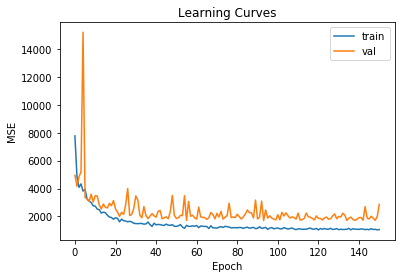

In [92]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('MSE')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [93]:
preds = solar_model.predict(test_features,
verbose = 1)

113/113 [==============================] - 0s 217us/sample


In [94]:
diff_mse = np.mean((np.transpose(preds) - test_labels)**2)
print(diff_mse)


2661.858


In [103]:
solar_model_linear = tf.keras.Sequential([
  normalize,
  layers.Dense(
      1, 
      kernel_initializer=initializer,
      kernel_regularizer = tf.keras.regularizers.l2(l= lambder),
      input_shape = (78,)
  )
])

solar_model_linear.compile(loss = 'mse',
                      optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.01))

history_linear = solar_model_linear.fit(solar_features, 
                solar_labels, 
                epochs=325,
                verbose = 2,
                #batch_size = 100,
                #callbacks = None,
                validation_split = 0.2,
                #validation_data = None,
                #shuffle = True,
                #class_weight = None,
                #sample_weight = None,
                #initial_epoch = 0
               )

Train on 1708 samples, validate on 427 samples
Epoch 1/325
1708/1708 - 0s - loss: 34353.9459 - val_loss: 31031.7097
Epoch 2/325
1708/1708 - 0s - loss: 32948.3642 - val_loss: 29786.2096
Epoch 3/325
1708/1708 - 0s - loss: 31740.7526 - val_loss: 28763.8228
Epoch 4/325
1708/1708 - 0s - loss: 30638.8779 - val_loss: 27800.9693
Epoch 5/325
1708/1708 - 0s - loss: 29622.5938 - val_loss: 26958.6589
Epoch 6/325
1708/1708 - 0s - loss: 28723.4659 - val_loss: 26173.9139
Epoch 7/325
1708/1708 - 0s - loss: 27931.1230 - val_loss: 25504.6686
Epoch 8/325
1708/1708 - 0s - loss: 27169.4439 - val_loss: 24870.8323
Epoch 9/325
1708/1708 - 0s - loss: 26468.2219 - val_loss: 24296.9508
Epoch 10/325
1708/1708 - 0s - loss: 25844.8082 - val_loss: 23783.1643
Epoch 11/325
1708/1708 - 0s - loss: 25255.2569 - val_loss: 23292.3359
Epoch 12/325
1708/1708 - 0s - loss: 24703.4617 - val_loss: 22841.9109
Epoch 13/325
1708/1708 - 0s - loss: 24198.1585 - val_loss: 22436.9554
Epoch 14/325
1708/1708 - 0s - loss: 23729.9393 - val

Epoch 118/325
1708/1708 - 0s - loss: 8559.7561 - val_loss: 8591.3927
Epoch 119/325
1708/1708 - 0s - loss: 8497.5624 - val_loss: 8530.6635
Epoch 120/325
1708/1708 - 0s - loss: 8435.1810 - val_loss: 8466.2350
Epoch 121/325
1708/1708 - 0s - loss: 8372.2245 - val_loss: 8404.6246
Epoch 122/325
1708/1708 - 0s - loss: 8310.4090 - val_loss: 8348.5796
Epoch 123/325
1708/1708 - 0s - loss: 8249.0202 - val_loss: 8288.9263
Epoch 124/325
1708/1708 - 0s - loss: 8191.6451 - val_loss: 8230.2318
Epoch 125/325
1708/1708 - 0s - loss: 8131.2265 - val_loss: 8175.4818
Epoch 126/325
1708/1708 - 0s - loss: 8074.0334 - val_loss: 8121.2456
Epoch 127/325
1708/1708 - 0s - loss: 8016.4658 - val_loss: 8065.2705
Epoch 128/325
1708/1708 - 0s - loss: 7959.4717 - val_loss: 8006.6688
Epoch 129/325
1708/1708 - 0s - loss: 7901.8507 - val_loss: 7951.9192
Epoch 130/325
1708/1708 - 0s - loss: 7846.9008 - val_loss: 7902.0375
Epoch 131/325
1708/1708 - 0s - loss: 7791.8447 - val_loss: 7844.4096
Epoch 132/325
1708/1708 - 0s - los

Epoch 237/325
1708/1708 - 0s - loss: 5322.1266 - val_loss: 5529.2948
Epoch 238/325
1708/1708 - 0s - loss: 5318.8184 - val_loss: 5526.4247
Epoch 239/325
1708/1708 - 0s - loss: 5315.8640 - val_loss: 5526.2583
Epoch 240/325
1708/1708 - 0s - loss: 5313.9019 - val_loss: 5525.4162
Epoch 241/325
1708/1708 - 0s - loss: 5310.8122 - val_loss: 5525.4348
Epoch 242/325
1708/1708 - 0s - loss: 5309.2924 - val_loss: 5522.9015
Epoch 243/325
1708/1708 - 0s - loss: 5305.9142 - val_loss: 5519.9001
Epoch 244/325
1708/1708 - 0s - loss: 5303.6223 - val_loss: 5519.4723
Epoch 245/325
1708/1708 - 0s - loss: 5301.0616 - val_loss: 5523.4855
Epoch 246/325
1708/1708 - 0s - loss: 5300.4822 - val_loss: 5520.2565
Epoch 247/325
1708/1708 - 0s - loss: 5296.6733 - val_loss: 5518.9139
Epoch 248/325
1708/1708 - 0s - loss: 5294.7894 - val_loss: 5516.3198
Epoch 249/325
1708/1708 - 0s - loss: 5293.0717 - val_loss: 5519.0692
Epoch 250/325
1708/1708 - 0s - loss: 5292.0364 - val_loss: 5516.9001
Epoch 251/325
1708/1708 - 0s - los

In [104]:
min_val_linear = np.min(history_linear.history['val_loss'])
print(min_val_linear)
np.where(history_linear.history['val_loss'] == min_val_linear)

#.001: 5422 at 315
#.01: 5534.9 at 361
#.1: 6128 at 29

5496.095969278304


(array([287]),)

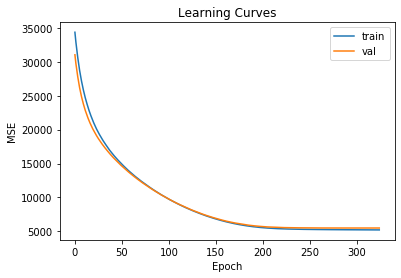

In [105]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('MSE')
pyplot.plot(history_linear.history['loss'], label='train')
pyplot.plot(history_linear.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [106]:
lin_preds = solar_model_linear.predict(test_features,
verbose = 1)

lin_diff_mse = np.mean((np.transpose(lin_preds) - test_labels)**2)
print(lin_diff_mse)

113/113 [==============================] - 0s 173us/sample
4673.6704
